In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [15]:
labels = os.listdir(r'E:\INR\training')
print(labels)

['10', '100']


In [16]:
ten=r'E:\INR\training\10'
hundred=r'E:\INR\training\100'

train_ten = os.listdir(ten)
print(train_ten[:10])

train_hundred = os.listdir(hundred)
print(train_hundred[:10])

['10_val_0.jpg', '10_val_1.jpg', '10_val_10.jpg', '10_val_11.jpg', '10_val_12.jpg', '10_val_13.jpg', '10_val_14.jpg', '10_val_15.jpg', '10_val_16.jpg', '10_val_17.jpg']
['100__0.jpg', '100__1.jpg', '100__10.jpg', '100__100.jpg', '100__101.jpg', '100__102.jpg', '100__103.jpg', '100__104.jpg', '100__105.jpg', '100__106.jpg']


In [17]:
print('total training 10 images:', len(os.listdir(ten)))
print('total training 100 images:', len(os.listdir(hundred)))

total training 10 images: 493
total training 100 images: 450


In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

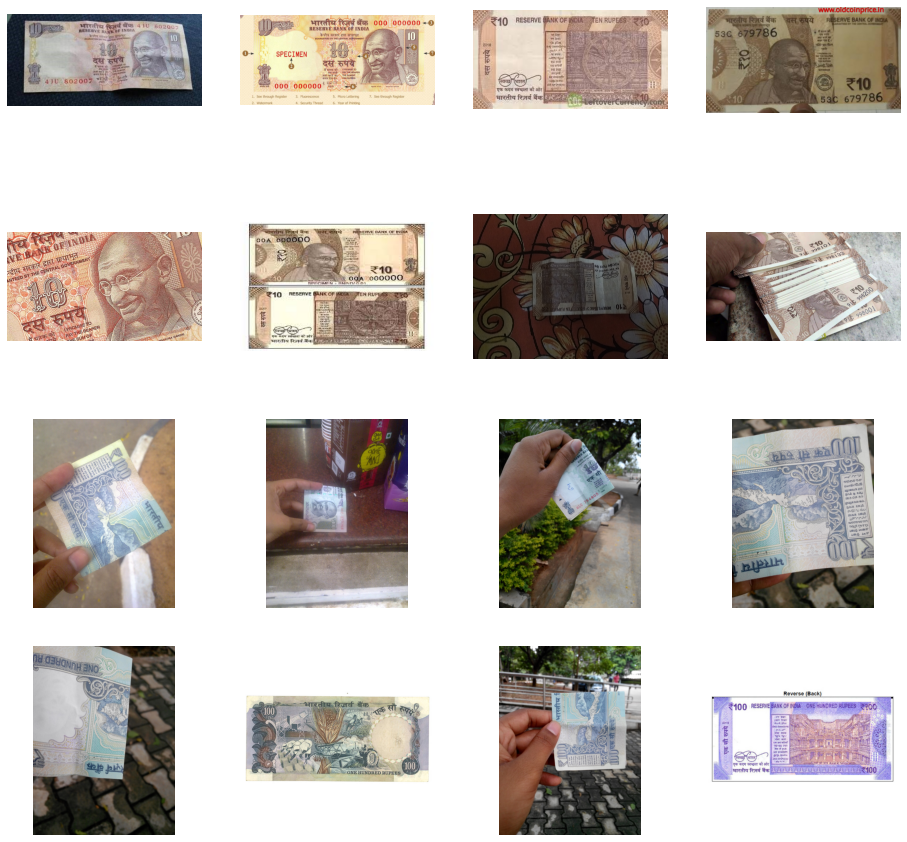

In [19]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ten = [os.path.join(ten, fname) 
                for fname in train_ten[pic_index-8:pic_index]]
next_hundred = [os.path.join(hundred, fname) 
                for fname in train_hundred[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ten+next_hundred):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


 10
there are  493  images in  10 class

 100
there are  450  images in  100 class


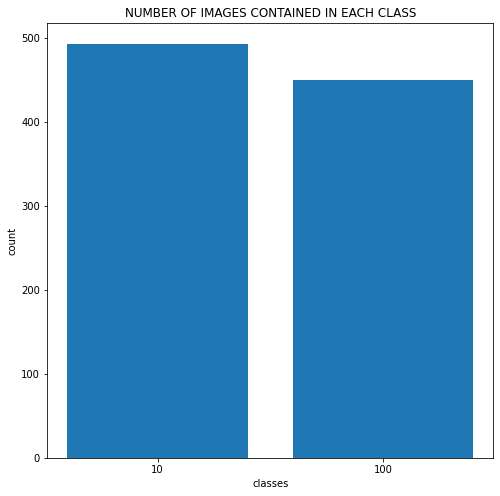

In [28]:
num = []
for label in labels:
    path = 'E:/INR/training/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')
    
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'E:/INR/training/',  
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 943 images belonging to 2 classes.


In [30]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 28s 3s/step - loss: 0.8698 - accuracy: 0.5005
Epoch 2/15
8/8 [==============================] - 25s 3s/step - loss: 0.7472 - accuracy: 0.5907
Epoch 3/15
8/8 [==============================] - 25s 3s/step - loss: 0.7189 - accuracy: 0.5302
Epoch 4/15
8/8 [==============================] - 28s 3s/step - loss: 0.6651 - accuracy: 0.5938
Epoch 5/15
8/8 [==============================] - 25s 3s/step - loss: 0.7454 - accuracy: 0.6119
Epoch 6/15
8/8 [==============================] - 24s 3s/step - loss: 0.6652 - accuracy: 0.5832
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.7153 - accuracy: 0.6787
Epoch 8/15
8/8 [==============================] - 25s 3s/step - loss: 0.6306 - accuracy: 0.6384
Epoch 9/15
8/8 [==============================] - 28s 3s/step - loss: 0.8045 - accuracy: 0.6066
Epoch 10/15
8/8 [==============================] - 25s 3s/step - loss: 0.5817 - accuracy: 0.6744
Epoch 11/15
8/8 [======================

In [31]:
model.save("Final.model", save_format="h5")

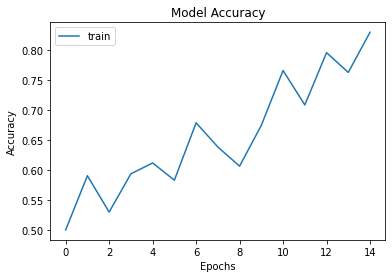

In [39]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

('E:/INR/training/10/10__42.jpg',)
[1.]
10


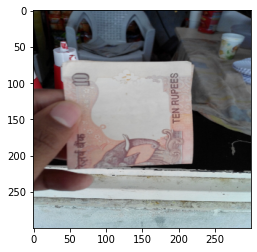

In [34]:
import numpy as np
from keras.preprocessing import image
from playsound import playsound
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import face_recognition
from tkinter import Tk
from tkinter import filedialog
from playsound import playsound

model = load_model("Final.model")

Tk().withdraw() 
path = filedialog.askopenfilenames() 
print(path)
img=cv2.imread(path[0])
img=cv2.resize(img, (300,300))

arr = image.img_to_array(img)
arr = np.expand_dims(arr, axis=0)
images = np.vstack([arr])
classes = model.predict(images)

print(classes[0])

if classes[0]>0.5:
    img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    print("10")
    #os.system(r"E:\INR\10.mp3")
    #playsound(r"E:\INR\10.mp3")
else:
    img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    print("100")
    #os.system(r"E:\INR\20.mp3")
    #playsound(r"E:\INR\20.mp3")